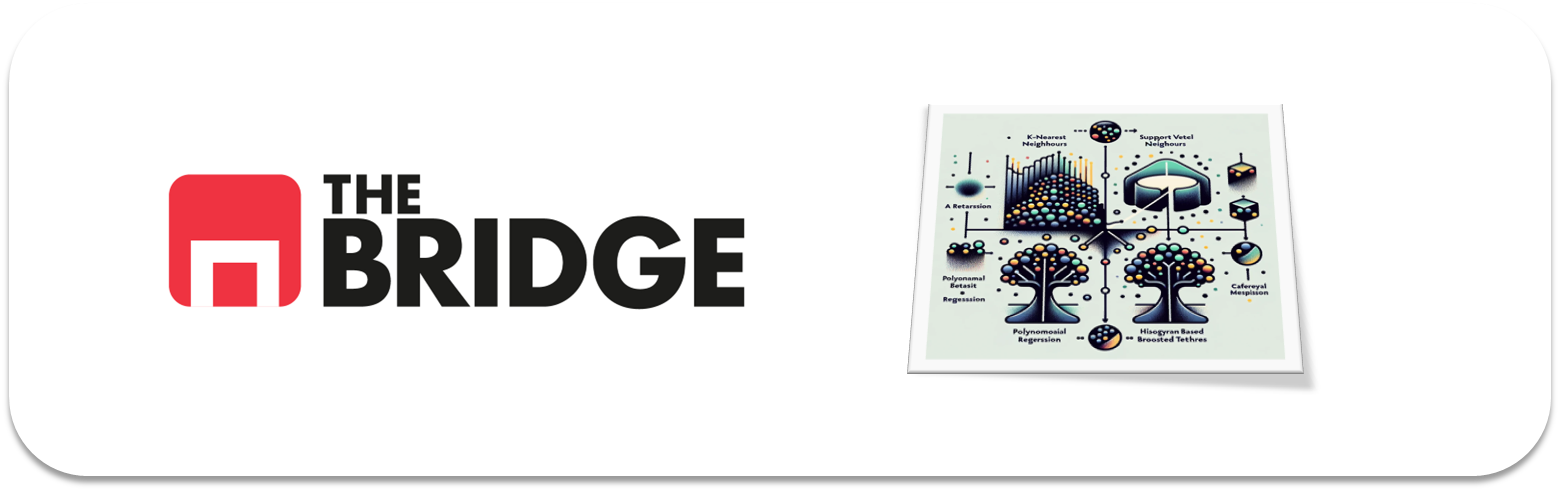

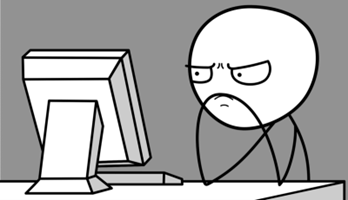

Para ejercitarte y afianzar lo aprendido sobre **Etapas Adicionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [31]:
import pandas as pd
import numpy as np

### #1 Equilibrado de Datasets

### Ejercicio 1

Carga el dataset de los diamantes (está en el directorio "data") preparado ya para poder entrenar un modelo de clasificación. Muestra las primeras 7 filas y observa el listado de columnas. Muestra la distribución del potencial target ("cut") que ya conoces. ¿Está desbalanceada?

In [32]:
data = pd.read_csv('./data/diamonds_preparado.csv',sep='|')
data.head(7)

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.24,Very Good,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0.24,Very Good,62.3,57.0,336,3.95,3.98,2.47,0,0,...,1,0,0,1,0,0,0,0,0,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_D       53940 non-null  int64  
 9   color_E       53940 non-null  int64  
 10  color_F       53940 non-null  int64  
 11  color_G       53940 non-null  int64  
 12  color_H       53940 non-null  int64  
 13  color_I       53940 non-null  int64  
 14  color_J       53940 non-null  int64  
 15  clarity_IF    53940 non-null  int64  
 16  clarity_VVS1  53940 non-null  int64  
 17  clarity_VVS2  53940 non-null  int64  
 18  clarity_VS1   53940 non-nu

In [34]:
data['cut'].value_counts(normalize=True)

cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: proportion, dtype: float64

- Está desbalanceada

 ### Ejercicio 2

 Crea un train_set y un test_set al 20%, crea los pares X,y de train y test con el target en la variable "cut", considera el resto como features.

In [35]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Definir características y variable objetivo
target = 'cut'
features = [col for col in data.columns if col != target]

# Crear pares X, y para train y test
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


In [36]:
X_train.shape

(43152, 22)

In [37]:
X_test.shape

(10788, 22)

### Ejercicio 3

Instancia un modelo RandomForest con max_depth a 5 y sin tocar otro hiperparámetro, entrénalo con el X_train y el y_train. Y muestra el classification_report para el X_train.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score

# Instanciar y entrenar el modelo RandomForest
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de entrenamiento
train_preds = rf_model.predict(X_train)
print("\nReporte de clasificación en train:")
print(classification_report(y_train, train_preds))


Reporte de clasificación en train:
              precision    recall  f1-score   support

        Fair       0.89      0.66      0.76      1275
        Good       0.81      0.35      0.49      3902
       Ideal       0.78      0.94      0.85     17259
     Premium       0.59      0.87      0.70     11016
   Very Good       0.63      0.22      0.33      9700

    accuracy                           0.70     43152
   macro avg       0.74      0.61      0.63     43152
weighted avg       0.70      0.70      0.66     43152



### Ejercicio 4

Dado el desbalanceo, nos queremos fijar en el recall medio (la media del recall considerando cada clase). Usando "cross_val_score", hagamos una estimación un poco más precisa (y en general pesimista) de cual sería ese recall medio del modelo en general. Asigna para ello a `scoring` el valor `balanced_accuracy`

In [39]:
from sklearn.model_selection import cross_val_score

# Estimación del recall medio con validación cruzada
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='balanced_accuracy')
mean_recall = np.mean(cv_scores)
print(f'Balanced Accuracy estimado con validación cruzada: {mean_recall:.4f}')

Balanced Accuracy estimado con validación cruzada: 0.6024


### Ejercicio 5

El resultado obtenido en el ejercicio 4 es bueno o malo dependiendo de lo que "Negocio" nos diga. Supón que negocio nos dice que quiere como mínimo que cada clase tenga un 50% de recall (que al menos un 50% de cada clase de diamente se etiquete bien por el modelo). Viendo el report anterior seguro que ves que así no llegamos. Tenemos que hacer algo, ayudar al modelo a conseguir ese objetivo. ¿Cómo? Con las téncias de equilibrado. Empecemos por aumentar las clases minoritarias con SMOTE. 

Crea un X_train y un y_train balanceados aplicando SMOTE; muestra el reparto del y_train para ver que se ha balanceado en todas las clases

In [40]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE para balancear las clases

tsmote = SMOTE(random_state=42)
X_train_bal, y_train_bal = tsmote.fit_resample(X_train, y_train)

# Mostrar distribución de clases tras balanceo
print("Distribución de clases en y_train antes del balanceo:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train después del balanceo:")
print(y_train_bal.value_counts())

Distribución de clases en y_train antes del balanceo:
cut
Ideal        17259
Premium      11016
Very Good     9700
Good          3902
Fair          1275
Name: count, dtype: int64

Distribución de clases en y_train después del balanceo:
cut
Good         17259
Very Good    17259
Premium      17259
Ideal        17259
Fair         17259
Name: count, dtype: int64


### Ejercicio 6

Entrena con el nuevo X,y y muestra los resultados del modelo así entrenado pero prediciendo contra el X_test creado en el ejercicio 2. Comenta el resultado. NOTA: En el caso de querer balancear con tecnicas de Oversampling y Undersampling, es interesante crear un set de validación adicional al de test y train, para no tener que usar el test como validación de los modelos.

In [41]:
# Instanciar y entrenar el modelo RandomForest
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Evaluación del modelo en el conjunto de entrenamiento
train_preds = rf_model.predict(X_train_bal)
print("\nReporte de clasificación en train:")
print(classification_report(y_train_bal, train_preds))

# Evaluación del modelo en el conjunto de prueba
test_preds = rf_model.predict(X_test)
print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))

# Estimación del recall medio con validación cruzada
cv_scores = cross_val_score(rf_model, X_train_bal, y_train_bal, cv=5, scoring='balanced_accuracy')
mean_recall = np.mean(cv_scores)
print(f'Balanced Accuracy estimado con validación cruzada: {mean_recall:.4f}')

# Comentario sobre los resultados
print("\nCOMENTARIO: Si el desempeño en test es significativamente menor que en train, puede indicar que el modelo está sobreajustando a los datos balanceados. Esto sugiere la necesidad de una validación adicional antes de evaluar contra el test para asegurar que el oversampling no genere un sesgo irreal en la evaluación final.")



Reporte de clasificación en train:
              precision    recall  f1-score   support

        Fair       0.96      0.74      0.84     17259
        Good       0.60      0.70      0.65     17259
       Ideal       0.68      0.94      0.79     17259
     Premium       0.50      0.81      0.62     17259
   Very Good       0.65      0.06      0.11     17259

    accuracy                           0.65     86295
   macro avg       0.68      0.65      0.60     86295
weighted avg       0.68      0.65      0.60     86295


Reporte de clasificación en test:
              precision    recall  f1-score   support

        Fair       0.88      0.80      0.84       335
        Good       0.50      0.68      0.57      1004
       Ideal       0.77      0.94      0.85      4292
     Premium       0.61      0.82      0.70      2775
   Very Good       0.64      0.06      0.11      2382

    accuracy                           0.68     10788
   macro avg       0.68      0.66      0.61     10788
weight

In [42]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import classification_report, recall_score
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# import numpy as np

# # Cargar los datos
# data = pd.read_csv('./data/diamonds_preparado.csv', sep='|')

# # Definir características y variable objetivo
# target = 'cut'
# features = [col for col in data.columns if col != target]

# # Codificar la variable objetivo a números
# label_encoder = LabelEncoder()
# data[target] = label_encoder.fit_transform(data[target])

# # Dividir en conjunto de entrenamiento, validación y prueba
# train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target])
# train, val = train_test_split(train, test_size=0.2, random_state=42, stratify=train[target])

# # Crear pares X, y para train, validación y test
# X_train, y_train = train[features], train[target]
# X_val, y_val = val[features], val[target]
# X_test, y_test = test[features], test[target]

# # Aplicar SMOTE-Tomek para balancear las clases
# ts = SMOTETomek(random_state=42)
# X_train_bal, y_train_bal = ts.fit_resample(X_train, y_train)

# # Mostrar distribución de clases tras balanceo
# print("Distribución de clases en y_train antes del balanceo:")
# print(y_train.value_counts())
# print("\nDistribución de clases en y_train después del balanceo:")
# print(y_train_bal.value_counts())

# # Instanciar y entrenar el modelo RandomForest con class_weight='balanced'
# rf_model = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42)
# rf_model.fit(X_train_bal, y_train_bal)

# # Evaluación del modelo en el conjunto de validación
# val_preds = rf_model.predict(X_val)
# print("\nReporte de clasificación en validación:")
# print(classification_report(y_val, val_preds))

# # Ajuste del umbral de predicción para mejorar recall mínimo del 50%
# y_val_proba = rf_model.predict_proba(X_val)
# thresholds = np.linspace(0.1, 0.9, 9)
# best_thresholds = [0.5] * len(label_encoder.classes_)

# for threshold in thresholds:
#     y_val_adjusted = np.zeros_like(y_val)
#     for i, class_label in enumerate(label_encoder.classes_):
#         y_val_adjusted[y_val_proba[:, i] >= threshold] = i
    
#     recall_scores = recall_score(y_val, y_val_adjusted, average=None)
#     min_recall = min(recall_scores)
    
#     if min_recall >= 0.5:
#         best_thresholds = [threshold] * len(label_encoder.classes_)
#         break

# print(f"Mejor umbral ajustado para todas las clases: {best_thresholds}")

# # Evaluación del modelo en el conjunto de prueba
# test_preds_proba = rf_model.predict_proba(X_test)
# test_preds = np.zeros_like(y_test)
# for i, class_label in enumerate(label_encoder.classes_):
#     test_preds[test_preds_proba[:, i] >= best_thresholds[i]] = i

# print("\nReporte de clasificación en test:")
# print(classification_report(y_test, test_preds))

### Ejercicio 7

Prueba ahora a mejorar el modelo empleando el hiperparámetro class_weight. Reinstancia el modelo, entrenalo contra el X_train inicial y luego muestra el report contra el test. Comenta brevemente el resultado.

In [43]:
# Instanciar y entrenar el modelo RandomForest con class_weight='balanced'
rf_model = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
test_preds = rf_model.predict(X_test)
print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))


Reporte de clasificación en test:
              precision    recall  f1-score   support

        Fair       0.88      0.84      0.86       335
        Good       0.49      0.71      0.58      1004
       Ideal       0.79      0.93      0.85      4292
     Premium       0.62      0.82      0.70      2775
   Very Good       0.62      0.06      0.11      2382

    accuracy                           0.69     10788
   macro avg       0.68      0.67      0.62     10788
weighted avg       0.68      0.69      0.63     10788



### Ejercicio 8

Para terminar con nuestros intentos de mejorar la clasificación "global", vamos a aplicar el bajomuestreo de las clases mayoritarias, aunque no tengamos muchas esperanzas puestas en ello. Para poder hacerlo vamos a usar la clase `RandomUnderSampler` de la biblioteca imblearn. Investiga un poco sobre su funcionamiento (pista es equivalente en su uso a la clase Smote) y crea un dataset con undersampling de forma que las clases estén equilibradas. Muestra las frecuencias del target. ¿Por qué no tenemos muchas expectativas, en este caso, sobre esta técnica? 

In [44]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar RandomUnderSampler para equilibrar las clases
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


# Mostrar distribución de clases tras el undersampling
print("Distribución de clases en y_train antes del undersampling:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train después del undersampling:")
print(y_train_under.value_counts())

Distribución de clases en y_train antes del undersampling:
cut
Ideal        17259
Premium      11016
Very Good     9700
Good          3902
Fair          1275
Name: count, dtype: int64

Distribución de clases en y_train después del undersampling:
cut
Fair         1275
Good         1275
Ideal        1275
Premium      1275
Very Good    1275
Name: count, dtype: int64


### Ejercicio 9

Entrena, ahora con class_weight a None, un RandomForest como el inicial pero contra el train creado en el ejercicio 8, muestra su informe de clasificación sobre la predicción contra test y comenta el resultado.

In [45]:
# Instanciar y entrenar el modelo RandomForest sin class_weight
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
rf_model.fit(X_train_under, y_train_under)

# Evaluación del modelo en el conjunto de prueba
test_preds = rf_model.predict(X_test)
print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))


Reporte de clasificación en test:
              precision    recall  f1-score   support

        Fair       0.81      0.84      0.82       335
        Good       0.53      0.65      0.58      1004
       Ideal       0.79      0.92      0.85      4292
     Premium       0.61      0.85      0.71      2775
   Very Good       0.54      0.07      0.13      2382

    accuracy                           0.69     10788
   macro avg       0.66      0.67      0.62     10788
weighted avg       0.66      0.69      0.63     10788



### #2 Análisis de Errores

### Ejercicio 10

Muestra la matriz de confusión con "ConfusionMatrixDisplay.from_predictions" para el clasificador entrenado con el hiperparámetro class_weight con el valor "balanced" (el del ejercicio 7). Asigna el valor "true" (ojo es un string, no el booleano True) al argumento normalize. Comenta que estamos viendo y hacia donde se dirigen los errores de clasificación de "Very Good"


Reporte de clasificación en test:
              precision    recall  f1-score   support

        Fair       0.88      0.84      0.86       335
        Good       0.49      0.71      0.58      1004
       Ideal       0.79      0.93      0.85      4292
     Premium       0.62      0.82      0.70      2775
   Very Good       0.62      0.06      0.11      2382

    accuracy                           0.69     10788
   macro avg       0.68      0.67      0.62     10788
weighted avg       0.68      0.69      0.63     10788



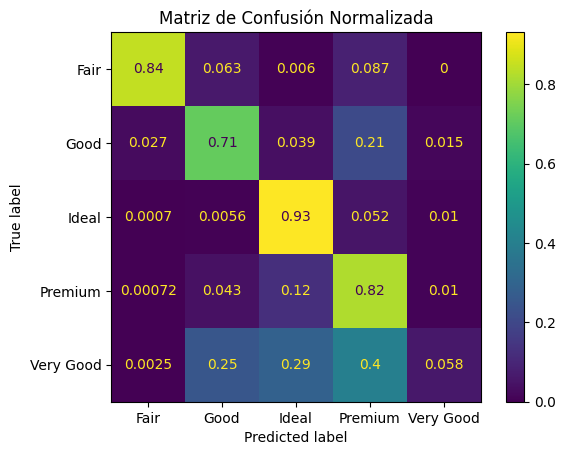

In [46]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instanciar y entrenar el modelo RandomForest con class_weight='balanced'
rf_model = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
test_preds = rf_model.predict(X_test)
print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true")
plt.title("Matriz de Confusión Normalizada")
plt.show()

### Ejercicio 11

Muestra ahora la matriz de confusión, empleando la misma función, pero esta vez enseñando los porcentajes de distribució de los errores en la predicción, para eso emplea normalize = "pred" como argumeto y date cuenta de que las columnas son las que ahora suman el 100%. Comenta el resultado respecto a "Premium" como predicción y a lo que se equivoca respecto a "Very Good". 

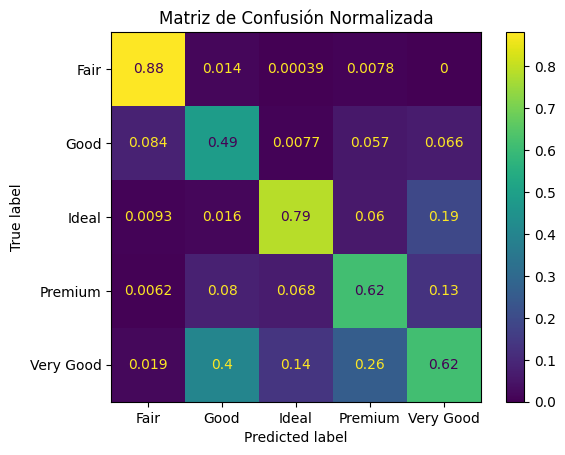

In [47]:
# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="pred")
plt.title("Matriz de Confusión Normalizada")
plt.show()

### Ejercicio 12

Dada la relación entre los errores de "Very Good" y "Prediction" que puedes haber observado en los ejercicios anteriores, una posible mejora es introducir un modelo que corrija esos errores, pero esa es la filosofía de los Gradient Boosted Trees. Provemos esa línea: Entrena un CatBoost con los hiperparámetros ajustados para que no emplee más de 5 niveles en sus árboles intermedios y para que balanceé las clases.

1. Obtener el "balanced_accuracy" primero con una validación cruzada.
2. Evaluálo después de contra el test.

Balanced Accuracy estimado con validación cruzada: 0.7852

Reporte de clasificación en test:
              precision    recall  f1-score   support

        Fair       0.89      0.92      0.90       335
        Good       0.71      0.81      0.76      1004
       Ideal       0.84      0.89      0.87      4292
     Premium       0.79      0.83      0.81      2775
   Very Good       0.70      0.53      0.61      2382

    accuracy                           0.79     10788
   macro avg       0.78      0.80      0.79     10788
weighted avg       0.79      0.79      0.78     10788



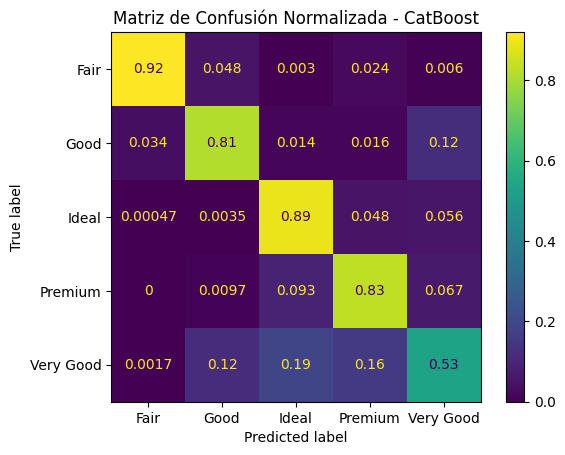

In [48]:
from catboost import CatBoostClassifier

# Instanciar y entrenar el modelo CatBoost con max_depth=5 y balanceo de clases
cat_model = CatBoostClassifier(depth=5, auto_class_weights='Balanced', random_state=42, verbose=0)

# Evaluación con validación cruzada
cv_scores = cross_val_score(cat_model, X_train, y_train, cv=5, scoring='balanced_accuracy')
print(f'Balanced Accuracy estimado con validación cruzada: {np.mean(cv_scores):.4f}')

# Entrenar el modelo con los datos originales
cat_model.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
test_preds = cat_model.predict(X_test)
print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true")
plt.title("Matriz de Confusión Normalizada - CatBoost")
plt.show()
